# Advanced Regression - Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

    Which variables are significant in predicting the price of a house, and
    How well those variables describe the price of a house.


Steps:
    1. Data understanding
    2. Data preparation
    3. Visualizing the data
    4. Model Building
        4.1 Using Lasso Regression
        4.2 Using Ridge Regression
    5. Inferences and recommendations from above Model

In [1]:
#supressing warnings
import warnings
warnings.filterwarnings('ignore')
#importing necessary libraries to handle data 
import numpy as np
import pandas as pd
#importing necessary libraries for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
#importing necessary libraries to perform Linear, Lasso and Ridge Regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#importing libraries for scaling
from sklearn.preprocessing import StandardScaler
#importing libraries for test train split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
#importing libraries for Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#Reading the dataset provided
housePrice_df = pd.read_csv("train.csv")

In [3]:
# option to view all columns
pd.set_option('display.max_columns',None)
#reading the first 5 rows of data set
housePrice_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#describing the dataset
housePrice_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#shape of the dataframe
housePrice_df.shape

(1460, 81)

In [6]:
#checking for the duplicate values
any(housePrice_df.duplicated())

False

It is clear that there is no duplicate values present in the dataset.

Lets missing value counts and its percentages at each level of handling the missing values.

In [7]:
# Checking for the missing values
round(100*(housePrice_df.isnull().sum()/len(housePrice_df.index)), 2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64

## Missing Value Treatment

There are three columns are having the more than 80% of missing data values. even if we impute those values with any other value the data will be skewed with one data point and there wont be any variance with these columns. Hence I am droping the columns which are having more than 80% of missing data

In [8]:
#droping the values which are having more than 80% of missing values
housePrice_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],inplace=True)

Based on the data available in the data description file, we can conclude that if any categorical variable is having Null /Nan values means that variable does not have any value. Hence we are imputing each column with the variables like No Fire Place , and so on.

In [9]:
#checking again for missing values
round(100*(housePrice_df.isnull().sum()/len(housePrice_df.index)), 2).sort_values(ascending = False)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
                 ...  
CentralAir        0.00
HeatingQC         0.00
SaleCondition     0.00
TotalBsmtSF       0.00
Id                0.00
Length: 77, dtype: float64

In [10]:
# imputing nan with 'No Fireplace' value for FireplaceQu
housePrice_df['FireplaceQu'] = housePrice_df['FireplaceQu'].replace(np.nan, 'No Fireplace')
housePrice_df['FireplaceQu'].value_counts(dropna=False)

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [11]:
#checking again for missing values
round(100*(housePrice_df.isnull().sum()/len(housePrice_df.index)), 2).sort_values(ascending = False)

LotFrontage     17.74
GarageFinish     5.55
GarageType       5.55
GarageCond       5.55
GarageQual       5.55
                ...  
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
Id               0.00
Length: 77, dtype: float64

In [12]:
# imputing  Nan values with No Garage for GarageType,GarageFinish,GarageQual,GarageCond
missingGarage=['GarageType','GarageFinish','GarageQual','GarageCond']

for i in missingGarage:
    housePrice_df[i] = housePrice_df[i].replace(np.nan, 'No Garage')
for i in missingGarage:
    print(housePrice_df[i].value_counts())

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64
Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64
TA           1311
No Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64
TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64


From the above, it seems to be some of these columns are highly correlated and let us find which are highly correlated.

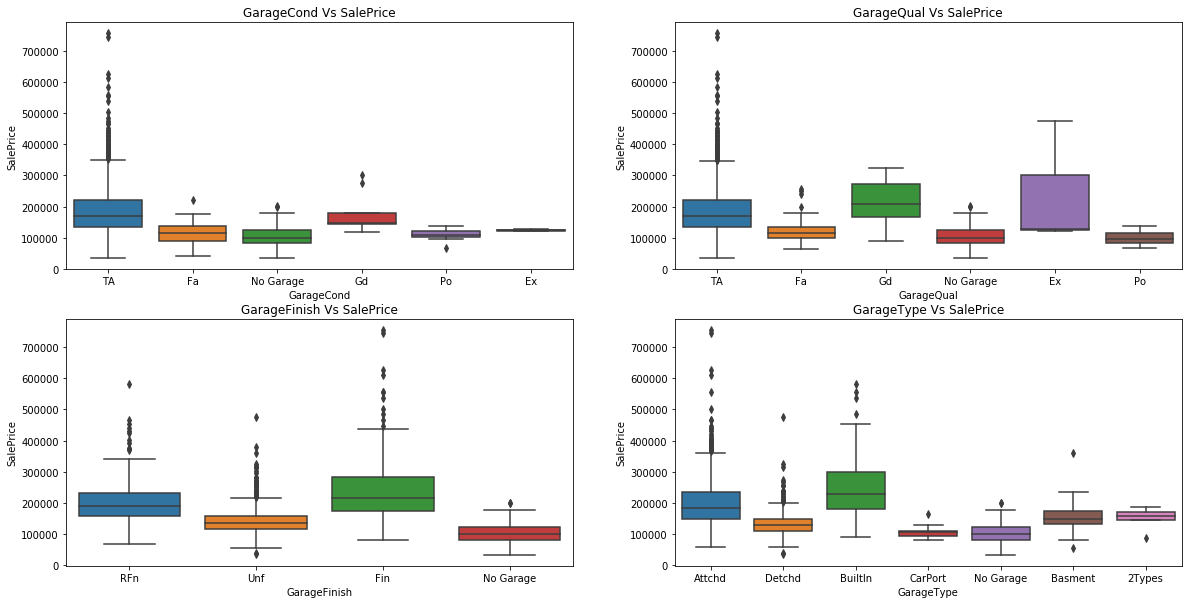

In [13]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
plt.title("GarageCond Vs SalePrice")
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housePrice_df)

plt.subplot(2,2,2)
plt.title("GarageQual Vs SalePrice")
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housePrice_df)

plt.subplot(2,2,3)
plt.title("GarageFinish Vs SalePrice")
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housePrice_df)

plt.subplot(2,2,4)
plt.title("GarageType Vs SalePrice")
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housePrice_df)

From the above, we can see that GarageCond and GarageQual with less variance of the data and highly coorelated. Hence I am droping the two columns. 

In [14]:
#droping the GarageCond and GarageQual
housePrice_df.drop(['GarageCond','GarageQual'],axis=1,inplace=True)

In [15]:
#checking again for missing values
round(100*(housePrice_df.isnull().sum()/len(housePrice_df.index)), 2).sort_values(ascending = False)

LotFrontage     17.74
GarageYrBlt      5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
                ...  
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
Id               0.00
Length: 75, dtype: float64

In [16]:
# imputing  Nan values with No Basement
missingBasement=['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']

for i in missingBasement:
    housePrice_df[i] = housePrice_df[i].replace(np.nan, 'No Basement')
for i in missingBasement:
    print(housePrice_df[i].value_counts())

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64
Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64


In [17]:
# due to due to skewness of the data, we are dropping the columns BsmtFinType2 and BsmtCond
housePrice_df.drop(['BsmtFinType2','BsmtCond'],axis=1,inplace=True)

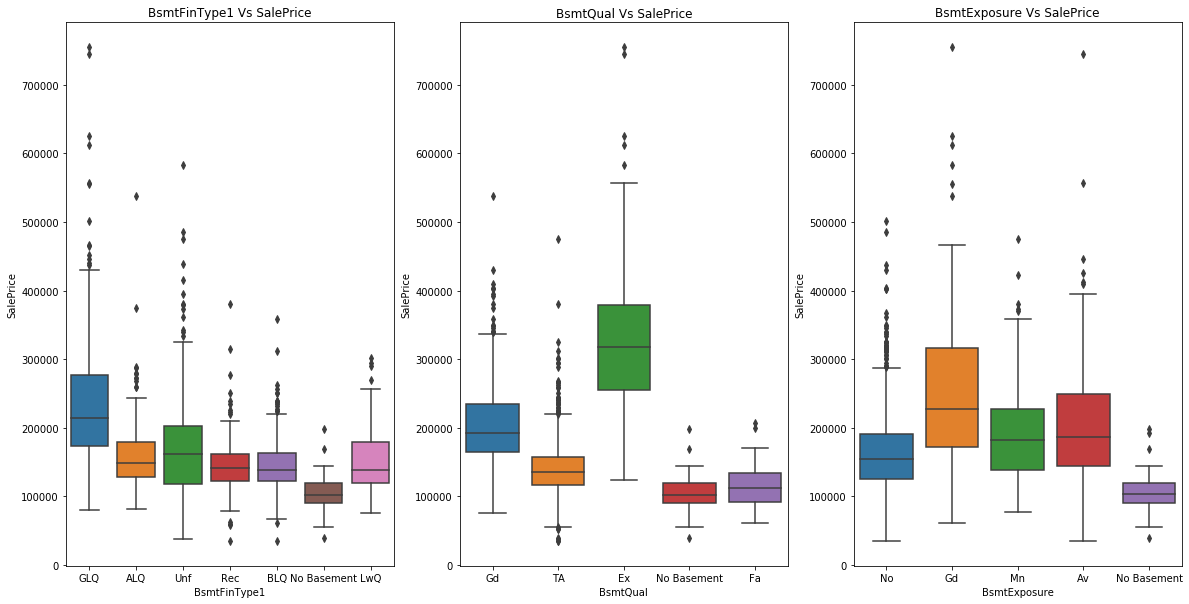

In [18]:
#plotting between the missing basement and target variable(Saleprice)
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.title("BsmtFinType1 Vs SalePrice")
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = housePrice_df)
plt.subplot(1,3,2)
plt.title("BsmtQual Vs SalePrice")
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housePrice_df)
plt.subplot(1,3,3)
plt.title("BsmtExposure Vs SalePrice")
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housePrice_df)


In [19]:
# BsmtFinType1 not having importance in the sale price Hence droping the column
housePrice_df.drop("BsmtFinType1",axis=1,inplace=True)

In [20]:
#Checking for value Counts for Electrical
housePrice_df['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [21]:
#The above column is having more skewness of the data hence we are droping the column.
housePrice_df.drop("Electrical",axis=1,inplace=True)

In [22]:
#checking again for missing values
round(100*(housePrice_df.isnull().sum()/len(housePrice_df.index)), 2).sort_values(ascending = False)

LotFrontage     17.74
GarageYrBlt      5.55
MasVnrArea       0.55
MasVnrType       0.55
SalePrice        0.00
                ...  
LowQualFinSF     0.00
2ndFlrSF         0.00
1stFlrSF         0.00
CentralAir       0.00
Id               0.00
Length: 71, dtype: float64

### Handling Missing values for contineous variables

In [23]:
#imputing Median for LotFrontage as it the data is having some outliers too.
housePrice_df['LotFrontage'].fillna(housePrice_df['LotFrontage'].median(),inplace=True)
housePrice_df['LotFrontage'].value_counts(dropna=False)

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
33.0       1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [24]:
# imputing  Nan with None for MasVnrType
housePrice_df['MasVnrType'] = housePrice_df['MasVnrType'].replace(np.nan, 'None')
housePrice_df['MasVnrType'].value_counts(dropna=False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

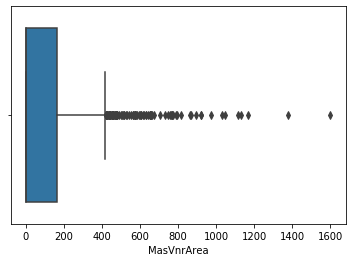

In [25]:
sns.boxplot(x='MasVnrArea', data=housePrice_df)

In [26]:
housePrice_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [27]:
# Since there are some outliers are present in the data for the MasVnrType we imputing  Nan with Median for MasVnrType
housePrice_df['MasVnrArea'].fillna(housePrice_df['MasVnrArea'].median(),inplace=True)
housePrice_df['MasVnrArea'].value_counts(dropna=False)

0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

GarageYrBlt is similar as YearBuilt thus there will be high correaltion betweent the two. Hence we are droping the column.
Droping the Month sold as it will not represent in the inferences of the model hence droping the column

In [28]:
housePrice_df.drop(['GarageYrBlt','MoSold'],axis=1,inplace=True)

In [29]:
#checking again for missing values
round(100*(housePrice_df.isnull().sum()/len(housePrice_df.index)), 2).sort_values(ascending = False)

SalePrice       0.0
MasVnrType      0.0
YearBuilt       0.0
YearRemodAdd    0.0
RoofStyle       0.0
               ... 
2ndFlrSF        0.0
1stFlrSF        0.0
CentralAir      0.0
HeatingQC       0.0
Id              0.0
Length: 69, dtype: float64

Since there is no missing values Then we will proceed further.

In [30]:
# Formatting the years to number of years
housePrice_df['HouseAge']= 2020-housePrice_df['YearBuilt']
housePrice_df['House_RemodelAge']= 2020-housePrice_df['YearRemodAdd']

In [31]:
#Droping the Id Column as it is unique.
housePrice_df.drop("Id", axis = 1, inplace = True)

## EDA

In this section we will try to explore the relation between independent variables and target variable i.e., Sale price. 
First we will perform the Heat map

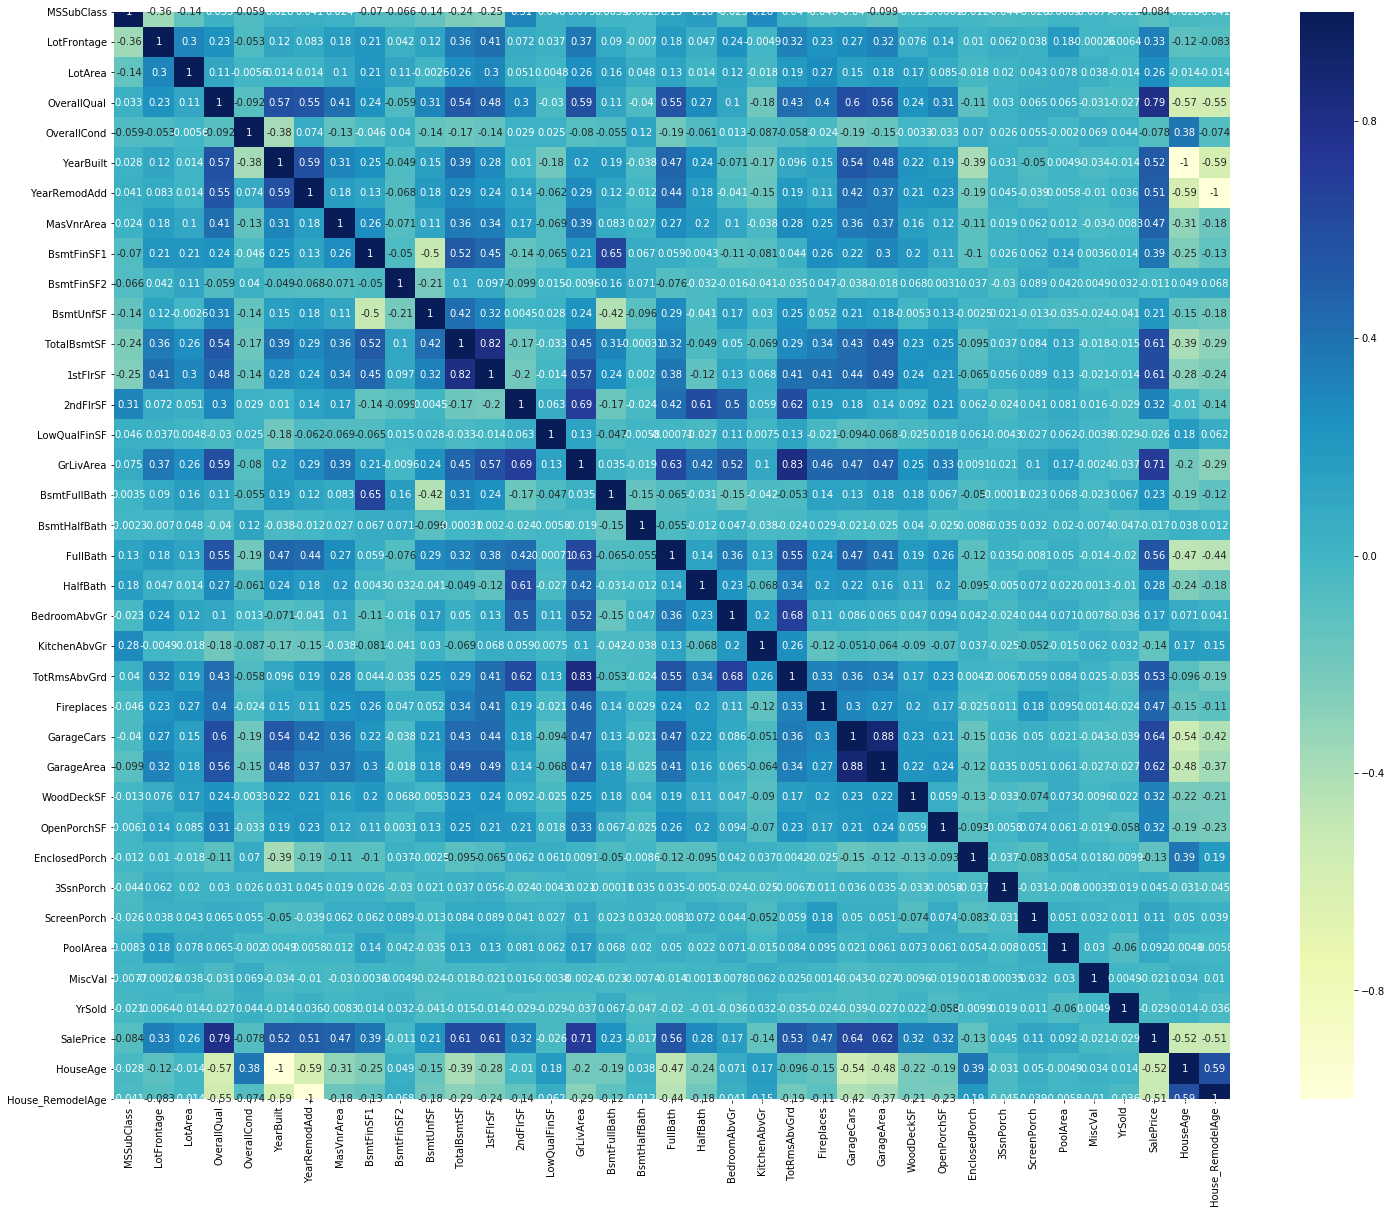

In [32]:
# figure size
plt.figure(figsize=(25,20))
# heatmap
sns.heatmap(housePrice_df.corr(), cmap="YlGnBu", annot=True)


From the above correaltion map, we can observe that few columns are having postive correalation with the target variable and few variables are having negative correaltion with the target variable.

Target variable(Sale Price) is positive correlated with:
    
    OverallQual - Overall Quality of the House
    TotalBasmtSF - Total Basement area in SQFT
    1stFlrSF  - First Floor Area in SQFT 
    GrLivArea  - Total Area above ground living in SQFT 
    GarageCars  - Size of the Garage(Number of cars)
    GarageArea  - Total area of Garage in SQFT 

Target variable(Sale Price) is negatively correlated with:

    HouseAge  - Age of the property
    House_RemodelAge  - Age of the property after remodelling done


## Checking the target variable distribution


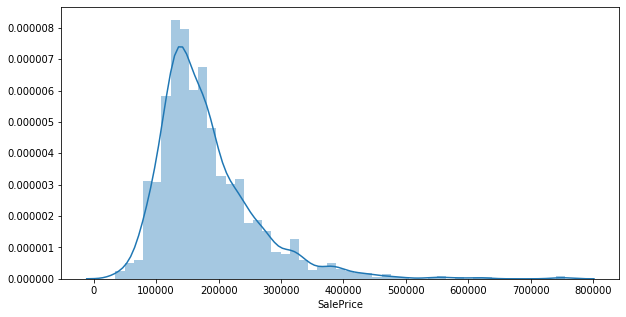

In [33]:
#Plotting dist plot:
plt.figure(figsize=(10,5))
sns.distplot(housePrice_df['SalePrice'])


Since the target variable is not normally distributed, hence we need to convert the target variable to log of target variable

In [34]:
housePrice_df['SalePrice'] = np.log(housePrice_df['SalePrice'])

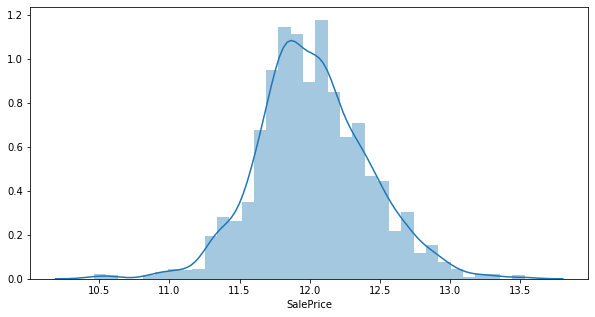

In [35]:
#Plotting dist plot:
plt.figure(figsize=(10,5))
sns.distplot(housePrice_df['SalePrice'])

In [36]:
#Dropping columns with skewed data  and highly correlated with other and columns which are not having business impact
housePrice_df.drop(['MSZoning','Street','LandContour','Utilities','Condition2','Condition1','LandSlope','RoofMatl','ExterCond',
              'Heating','Functional','PavedDrive','BldgType','BsmtHalfBath','KitchenAbvGr','SaleType','SaleCondition','BsmtFinSF1','BsmtUnfSF']
             ,axis=1, inplace=True)

In [37]:
#Extracting numerical / contineous variables for further analysis
num_var= [i for i in housePrice_df.columns if housePrice_df.dtypes[i]!='object']
cat_var = [i for i in housePrice_df.columns if housePrice_df.dtypes[i] =='object']

In [38]:
cat_var

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [39]:
for i in cat_var:
    print(i,housePrice_df[i].unique(),'\n')

LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 

LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 

Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock'] 

MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn'] 

ExterQual ['Gd' 'TA' 'Ex' 'Fa'] 

Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone'] 

BsmtQual ['Gd' 'TA'

### converting columns into binary values

In [40]:
# Mapping Central Air to binary values
housePrice_df['CentralAir'] = housePrice_df['CentralAir'].replace({'N': 0, 'Y': 1})


In [41]:
#Checking for value Counts for Neighborhood
housePrice_df['Neighborhood'].value_counts(dropna=False)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [42]:
# Combining value counts less than 30 into Others for Neibhourhood 
housePrice_df['Neighborhood'].replace({'ClearCr':'Others'},inplace=True)
housePrice_df['Neighborhood'].replace({'StoneBr':'Others'},inplace=True)
housePrice_df['Neighborhood'].replace({'SWISU':'Others'},inplace=True)
housePrice_df['Neighborhood'].replace({'MeadowV':'Others'},inplace=True)
housePrice_df['Neighborhood'].replace({'Blmngtn':'Others'},inplace=True)
housePrice_df['Neighborhood'].replace({'BrDale':'Others'},inplace=True)
housePrice_df['Neighborhood'].replace({'Veenker':'Others'},inplace=True)
housePrice_df['Neighborhood'].replace({'NPkVill':'Others'},inplace=True)
housePrice_df['Neighborhood'].replace({'Blueste':'Others'},inplace=True)

In [43]:
#Based on the data description, There are few variables are in numerical but actually they are categorical. 
#converting them into categorical variables
housePrice_df['MSSubClass'] = housePrice_df['MSSubClass'].astype('object')
housePrice_df['OverallQual'] = housePrice_df['OverallQual'].astype('object')
housePrice_df['OverallCond'] = housePrice_df['OverallCond'].astype('object')
housePrice_df['BsmtFullBath'] = housePrice_df['BsmtFullBath'].astype('object')
housePrice_df['FullBath'] = housePrice_df['FullBath'].astype('object')
housePrice_df['HalfBath'] = housePrice_df['HalfBath'].astype('object')
housePrice_df['BedroomAbvGr'] = housePrice_df['BedroomAbvGr'].astype('object')
housePrice_df['TotRmsAbvGrd'] = housePrice_df['TotRmsAbvGrd'].astype('object')
housePrice_df['Fireplaces'] = housePrice_df['Fireplaces'].astype('object')
housePrice_df['GarageCars'] = housePrice_df['GarageCars'].astype('object')


### Creating Dummy Variables

In [44]:
# Creating Dummy variables for categorical variables
cat_var_df = housePrice_df.select_dtypes(include=['object'])
# converting categorical variables in dummy variables
cat_dummies = pd.get_dummies(cat_var_df, drop_first=True)
#reading the top 5 rows
cat_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0

In [45]:
# concatenating dummy variable dataframe into original dataframe.
housePrice_df = pd.concat([housePrice_df, cat_dummies], axis=1)
housePrice_df.shape

(1460, 219)

In [46]:
# Dropping the original categorical columns.
housePrice_df.drop(['MSSubClass','LotShape','LotConfig','Neighborhood','HouseStyle','OverallQual','OverallCond','RoofStyle',
              'Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','HeatingQC',
              'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces',
              'FireplaceQu','GarageType','GarageFinish','GarageCars'],axis=1,inplace=True)
housePrice_df.shape

(1460, 192)

In [47]:
# Creating dataframe for  for contineous variables
num_var_df=housePrice_df.select_dtypes(include =['int64','float64'])
#reading the top 5 rows
num_var_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,HouseAge,House_RemodelAge
0,65.0,8450,2003,2003,196.0,0,856,1,856,854,0,1710,548,0,61,0,0,0,0,0,2008,12.247694,17,17
1,80.0,9600,1976,1976,0.0,0,1262,1,1262,0,0,1262,460,298,0,0,0,0,0,0,2007,12.109011,44,44
2,68.0,11250,2001,2002,162.0,0,920,1,920,866,0,1786,608,0,42,0,0,0,0,0,2008,12.317167,19,18
3,60.0,9550,1915,1970,0.0,0,756,1,961,756,0,1717,642,0,35,272,0,0,0,0,2006,11.849398,105,50
4,84.0,14260,2000,2000,350.0,0,1145,1,1145,1053,0,2198,836,192,84,0,0,0,0,0,2008,12.429216,20,20


In [48]:
num_var_df.describe(percentiles=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.9,0.95,0.99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,HouseAge,House_RemodelAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,46.549315,1057.429452,0.934932,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,12.024051,48.732192,35.134247
std,22.027677,9981.264932,30.202904,20.645407,180.731373,161.319273,438.705324,0.246731,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,0.399452,30.202904,20.645407
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,10.460242,10.000000,10.000000
5%,35.950000,3311.700000,1916.000000,1950.000000,0.000000,0.000000,519.300000,0.000000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,11.385092,13.000000,13.000000
10%,49.000000,5000.000000,1924.900000,1950.000000,0.000000,0.000000,636.900000,1.000000,756.900000,0.000000,0.000000,912.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,11.575665,14.000000,14.000000
20%,59.000000,7078.400000,1947.800000,1961.800000,0.000000,0.000000,755.800000,1.000000,848.000000,0.000000,0.000000,1066.600000,295.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,11.728037,17.000000,15.000000
30%,60.000000,8063.700000,1958.000000,1971.000000,0.000000,0.000000,840.000000,1.000000,915.700000,0.000000,0.000000,1208.000000,384.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,11.816727,22.700000,18.000000
40%,68.000000,8793.400000,1965.000000,1980.000000,0.000000,0.000000,910.000000,1.000000,1000.200000,0.000000,0.000000,1339.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,11.898188,36.000000,22.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,0.000000,991.500000,1.000000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,12.001505,47.000000,26.000000


From the above, there are few variables which are having zero values. Hence we are droping them.

In [49]:
housePrice_df.drop(['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

In [50]:
cat_var

['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [51]:
#Extracting numerical / contineous variables for further analysis
num_var= [i for i in housePrice_df.columns if housePrice_df.dtypes[i]!='object']
cat_var = [i for i in housePrice_df.columns if housePrice_df.dtypes[i] =='object']
num_var

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'YrSold',
 'SalePrice',
 'HouseAge',
 'House_RemodelAge',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Others',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somer

## Data preparation

In [52]:
# Splitting the data into train and test data
housePrice_df_train,housePrice_df_test = train_test_split(housePrice_df, train_size=0.7,random_state=100)

In [53]:
# Scaling the continuous variables.
scaler = StandardScaler()
housePrice_df_train[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'CentralAir',
 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'HouseAge', 'House_RemodelAge']] = scaler.fit_transform(housePrice_df_train[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'CentralAir',
 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'HouseAge', 'House_RemodelAge']])
housePrice_df_test[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'CentralAir',
 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'HouseAge', 'House_RemodelAge']] = scaler.fit_transform(housePrice_df_test[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'CentralAir',
 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'HouseAge', 'House_RemodelAge']])

In [54]:
y_train = housePrice_df_train.pop('SalePrice')
X_train = housePrice_df_train

In [55]:
y_test = housePrice_df_test.pop('SalePrice')
X_test = housePrice_df_test

## Ridge Regression

Now We will perform the Ridge regression using negative mean absolute error.

In [56]:
# creating some list of alpha values to perform the regression
params = {'alpha': [0.01,0.1,1,10,20,50,75,100]}
#ridge regression
ridge = Ridge()
# cross validation
folds = 10
#creating cross  validation model using Ridge regression with score of negative mean absolute error.
cv_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
cv_model.fit(X_train, y_train) 

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.4s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 20, 50, 75, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [57]:
# copying CV model results into dataframe .
cv_model_results = pd.DataFrame(cv_model.cv_results_)
cv_model_results['param_alpha'] = cv_model_results['param_alpha'].astype('float32')
#reading the top 5 rows of CV Model result data frame
cv_model_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007237,0.002679,0.001970,0.000630,0.01,{'alpha': 0.01},-0.242522,-0.264530,-0.239172,-0.265140,-0.289546,-0.279721,-0.249546,-0.250772,-0.230321,-0.272359,-0.258348,0.018024,8,-0.199915,-0.197810,-0.198300,-0.183377,-0.194094,-0.189050,-0.197483,-0.199857,-0.200635,-0.194124,-0.195464,0.005238
1,0.007499,0.001626,0.001852,0.000581,0.10,{'alpha': 0.1},-0.241939,-0.260024,-0.238495,-0.263963,-0.285111,-0.278586,-0.246342,-0.240948,-0.228693,-0.267145,-0.255112,0.017669,6,-0.199722,-0.197894,-0.198402,-0.183707,-0.194598,-0.189042,-0.197579,-0.199848,-0.200794,-0.194392,-0.195598,0.005157
2,0.009138,0.002625,0.002527,0.000937,1.00,{'alpha': 1},-0.234282,-0.248721,-0.237927,-0.260154,-0.279002,-0.269524,-0.239177,-0.235912,-0.223482,-0.244616,-0.247267,0.016409,3,-0.201327,-0.200555,-0.200042,-0.185861,-0.197268,-0.191492,-0.199367,-0.201680,-0.203464,-0.197351,-0.197841,0.005074
3,0.011248,0.006561,0.005422,0.004715,10.00,{'alpha': 10},-0.214240,-0.227772,-0.231531,-0.258532,-0.278052,-0.255527,-0.230683,-0.238823,-0.225302,-0.232469,-0.239269,0.018100,1,-0.209986,-0.210589,-0.207862,-0.194206,-0.204035,-0.200629,-0.206906,-0.207950,-0.211068,-0.205962,-0.205919,0.004924
4,0.011839,0.003586,0.003043,0.001304,20.00,{'alpha': 20},-0.209592,-0.226983,-0.229566,-0.266526,-0.276056,-0.260494,-0.231836,-0.241783,-0.233221,-0.231634,-0.240738,0.019525,2,-0.216708,-0.216701,-0.214384,-0.201396,-0.209986,-0.207419,-0.212916,-0.214122,-0.217532,-0.212855,-0.212402,0.004717


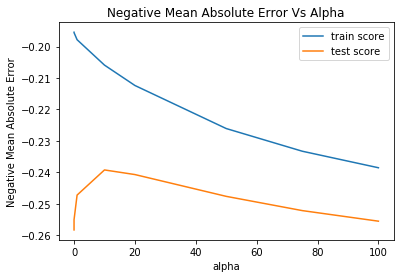

In [58]:
# plotting the test and train sets of Aplha and mean error
cv_model_results['param_alpha'] = cv_model_results['param_alpha'].astype('int32')

# plotting between the alpha and Negative Mean absolute Error for Train and Test sets
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error Vs Alpha")
plt.plot(cv_model_results['param_alpha'], cv_model_results['mean_train_score'])
plt.plot(cv_model_results['param_alpha'], cv_model_results['mean_test_score'])
plt.legend(['train score', 'test score'], loc='upper right')


In [59]:
# Finding out the best score and Optimum value of alpha
print(cv_model.best_estimator_)
print('best alpha value:',cv_model.best_params_)
print('Best score:',cv_model.best_score_)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
best alpha value: {'alpha': 10}
Best score: -0.2392685244211095


### Ridge Regression using R2 Score

Now We will perform the Ridge regression using R2 Score.

In [60]:
# creating some list of alpha values to tune the regression further 
params = {'alpha': [0.01,0.1,1,10,20,50,75,100]}
ridge = Ridge()
# cross validation
folds = 10
#creating the cross validation model using r2 score
cv_model_r2 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
cv_model_r2.fit(X_train, y_train) 

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.5s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 20, 50, 75, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [61]:
#creating CV model results into data frame
cv_Model_results_r2 = pd.DataFrame(cv_model_r2.cv_results_)
cv_Model_results_r2['param_alpha'] = cv_Model_results_r2['param_alpha'].astype('float32')
#reading the top 5 rows of data frame
cv_Model_results_r2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009636,0.002001,0.002318,0.000787,0.01,{'alpha': 0.01},0.880681,0.843025,0.904589,0.603626,0.837170,0.768607,0.880811,0.864916,0.918988,0.849769,0.835263,0.086690,7,0.925065,0.926819,0.923698,0.935544,0.926652,0.931991,0.925011,0.923933,0.920694,0.926695,0.926610,0.004055
1,0.010680,0.003599,0.002515,0.000409,0.10,{'alpha': 0.1},0.881634,0.847787,0.905024,0.605732,0.841619,0.771014,0.883197,0.874417,0.920430,0.859594,0.839086,0.086893,5,0.924952,0.926614,0.923548,0.935396,0.926487,0.931879,0.924844,0.923698,0.920551,0.926539,0.926451,0.004064
2,0.011749,0.004401,0.002919,0.001485,1.00,{'alpha': 1},0.888772,0.864868,0.907122,0.610182,0.842908,0.788288,0.888289,0.885191,0.925811,0.884394,0.848622,0.087129,3,0.922788,0.924052,0.921321,0.933278,0.924163,0.929525,0.922507,0.921469,0.918027,0.923525,0.924065,0.004120
3,0.021631,0.016692,0.006557,0.004870,10.00,{'alpha': 10},0.903095,0.883401,0.914527,0.599481,0.835373,0.801313,0.893392,0.887877,0.927252,0.896282,0.854247,0.091997,1,0.908986,0.910323,0.907885,0.922079,0.913276,0.915782,0.909620,0.909576,0.904170,0.909338,0.911104,0.004672
4,0.015172,0.011117,0.006608,0.008977,20.00,{'alpha': 20},0.904010,0.884473,0.914486,0.581003,0.834240,0.791878,0.893426,0.886072,0.922183,0.895555,0.850785,0.097289,2,0.899264,0.901034,0.898272,0.914684,0.904755,0.906798,0.900283,0.900630,0.894523,0.899733,0.901998,0.005288


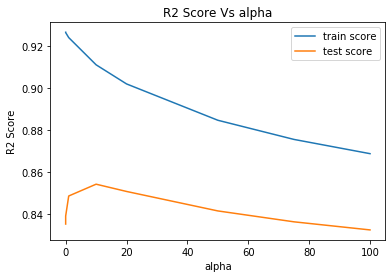

In [62]:
# plotting test and train scoes with alpha and r2 score
cv_Model_results_r2['param_alpha'] = cv_Model_results_r2['param_alpha'].astype('int32')

# plotting between the alpha and R2 Score for train and test sets
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs alpha")
plt.plot(cv_Model_results_r2['param_alpha'], cv_Model_results_r2['mean_train_score'])
plt.plot(cv_Model_results_r2['param_alpha'], cv_Model_results_r2['mean_test_score'])
plt.legend(['train score', 'test score'], loc='upper right')


In [63]:
# Finding out the best score and Optimum value of alpha
print(cv_model_r2.best_estimator_)
print('best alpha value:',cv_model_r2.best_params_)
print('Best score:',cv_model_r2.best_score_)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
best alpha value: {'alpha': 10}
Best score: 0.8542472175324293


From the above,the alpha value is 10 from the both r2 score and negative mean absolute error. Hence we are considering alpha value =10 for the Ridge regression. 

    alpha = 10

In [64]:
# Ridge Regression Model with alpha = 10:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
# r2 score for train set
y_pred_train = ridge.predict(X_train)
print('r2 Score for Train is ',r2_score(y_train,y_pred_train))
#r2 score for test set
y_pred_test = ridge.predict(X_test)
print('r2 Score for test is ',r2_score(y_test,y_pred_test))

r2 Score for Train is  0.9096804803315915
r2 Score for test is  0.866091438982336


In [65]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = housePrice_df.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Features','Coefficient']

In [66]:
#selecting the top 10 variables
ridge_coef[:10].sort_values(by='Coefficient',ascending=False)


,Features,Coefficient
9,GrLivArea,0.147724
0,LotFrontage,0.091727
8,2ndFlrSF,0.073740
3,YearRemodAdd,0.069124
7,1stFlrSF,0.061069
6,CentralAir,0.058608
2,YearBuilt,0.050184
4,MasVnrArea,0.042278
5,TotalBsmtSF,0.009447
1,LotArea,-0.010729


In [67]:
ridge_rmse = Ridge(alpha=10)
ridge_rmse.fit(X_train,y_train)
#mean squared error for train
y_pred_train_mean = ridge_rmse.predict(X_train)
print('Mean squared error for train is ',np.sqrt(mean_squared_error(y_train, y_pred_train_mean)))
# mean squared error for test
y_pred_test_mean = ridge_rmse.predict(X_test)
print('Mean squared error for test is ', np.sqrt(mean_squared_error(y_test, y_pred_test_mean)))


Mean squared error for train is  0.3005320609658951
Mean squared error for test is  0.3659351869083705


## Lasso Regression

Now we will perform the Lasso regression using negative Mean Absolute error

In [68]:
lasso = Lasso()
#Creating list of alpha values
param = {'alpha': [0.0001,  0.001,  0.002,  0.005, 0.01]}
folds = 10
# cross validation
cv_model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

cv_model_lasso.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [69]:
#Creating the results dataframe.
cv_model_results_lasso = pd.DataFrame(cv_model_lasso.cv_results_)
#reading top 5 rows
cv_model_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.166520,0.086166,0.001955,0.000849,0.0001,{'alpha': 0.0001},-0.238143,-0.258199,-0.237195,-0.260891,-0.283406,-0.278980,-0.242532,-0.237070,-0.224347,-0.263994,-0.252462,0.018602,4,-0.199981,-0.198668,-0.198680,-0.184489,-0.195932,-0.189231,-0.198215,-0.200599,-0.201259,-0.194969,-0.196202,0.005127
1,0.056805,0.008990,0.001639,0.000372,0.001,{'alpha': 0.001},-0.223789,-0.237680,-0.230011,-0.256868,-0.285267,-0.272192,-0.235030,-0.234995,-0.213934,-0.231342,-0.242093,0.021205,1,-0.206276,-0.205455,-0.205765,-0.191855,-0.202556,-0.195628,-0.203660,-0.204345,-0.207093,-0.202099,-0.202473,0.004692
2,0.047157,0.007694,0.001824,0.000781,0.002,{'alpha': 0.002},-0.218401,-0.233630,-0.229774,-0.261807,-0.285984,-0.275500,-0.238104,-0.238917,-0.217585,-0.224392,-0.242386,0.022705,2,-0.213420,-0.213807,-0.212654,-0.200625,-0.207661,-0.205278,-0.211025,-0.210904,-0.214558,-0.209431,-0.209936,0.004145
3,0.023310,0.006492,0.001553,0.000297,0.005,{'alpha': 0.005},-0.224437,-0.227313,-0.223467,-0.282505,-0.287065,-0.287459,-0.245813,-0.244187,-0.244779,-0.230765,-0.249754,0.024807,3,-0.231542,-0.233523,-0.231062,-0.220556,-0.228411,-0.225652,-0.230099,-0.228925,-0.235694,-0.230296,-0.229576,0.003980
4,0.012917,0.001846,0.001772,0.000564,0.01,{'alpha': 0.01},-0.244624,-0.233196,-0.230607,-0.323282,-0.298465,-0.312609,-0.257480,-0.257103,-0.287157,-0.249795,-0.269408,0.031676,5,-0.256550,-0.258409,-0.260512,-0.247329,-0.251999,-0.250793,-0.255132,-0.257818,-0.259621,-0.258994,-0.255716,0.004124


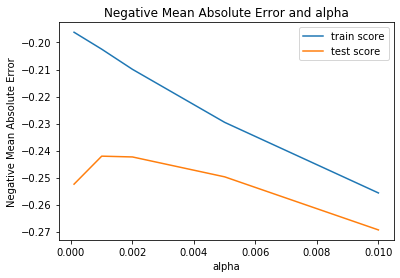

In [70]:
# plotting mean test and train scores with alpha 
cv_model_results_lasso['param_alpha'] = cv_model_results_lasso['param_alpha'].astype('float32')
# plotting between the negative mean absolute error and alpha
plt.plot(cv_model_results_lasso['param_alpha'], cv_model_results_lasso['mean_train_score'])
plt.plot(cv_model_results_lasso['param_alpha'], cv_model_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')


In [71]:
# finding out the best score and optimum value of alpha.
print(cv_model_lasso.best_estimator_)
print('best alpha value:',cv_model_lasso.best_params_)
print('Best score:',cv_model_lasso.best_score_)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
best alpha value: {'alpha': 0.001}
Best score: -0.24209288414189234


### Lasso Regression using R2 Score

Now we will perform the Lasso Regression using R2 Score

In [72]:
# list of alphas to tune the model
params = {'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01]}
lasso = Lasso()
# cross validation
folds=10
cv_model_lasso_r2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

cv_model_lasso_r2.fit(X_train, y_train) 

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.1s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [73]:
#Creating the results dataframe.
cv_model_lasso_r2_results = pd.DataFrame(cv_model_lasso_r2.cv_results_)
#reading the top 5 rows
cv_model_lasso_r2_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.141291,0.025316,0.002314,0.001310,0.0001,{'alpha': 0.0001},0.885452,0.851005,0.906892,0.604461,0.838332,0.770254,0.885625,0.877294,0.922950,0.856359,0.839907,0.088075,3,0.924434,0.925896,0.922947,0.934652,0.925736,0.931248,0.924167,0.922923,0.919888,0.925897,0.925779,0.004049
1,0.056867,0.015331,0.001818,0.000461,0.001,{'alpha': 0.001},0.894012,0.873540,0.913343,0.592281,0.829944,0.769091,0.892452,0.889417,0.931373,0.894532,0.848044,0.095772,1,0.914896,0.916481,0.913305,0.925332,0.916542,0.922376,0.915077,0.914606,0.909774,0.915933,0.916432,0.004201
2,0.058735,0.019371,0.001872,0.000545,0.002,{'alpha': 0.002},0.894412,0.882394,0.912937,0.577209,0.824067,0.763712,0.890966,0.885892,0.928891,0.899195,0.846015,0.100443,2,0.903302,0.904974,0.901582,0.916086,0.906838,0.910997,0.903489,0.903726,0.897555,0.903339,0.905189,0.004884
3,0.023495,0.007236,0.001590,0.000220,0.005,{'alpha': 0.005},0.892034,0.886946,0.912366,0.533002,0.813386,0.764017,0.879858,0.881823,0.910715,0.891486,0.836618,0.110299,4,0.875556,0.877187,0.875037,0.895825,0.879464,0.883804,0.876134,0.877766,0.868478,0.874744,0.878399,0.006871
4,0.011113,0.000648,0.001492,0.000076,0.01,{'alpha': 0.01},0.884592,0.876571,0.899596,0.463609,0.809894,0.726131,0.865963,0.868732,0.882355,0.873308,0.815143,0.126689,5,0.845570,0.847106,0.842604,0.870467,0.854513,0.855422,0.848160,0.846712,0.839557,0.844140,0.849425,0.008400


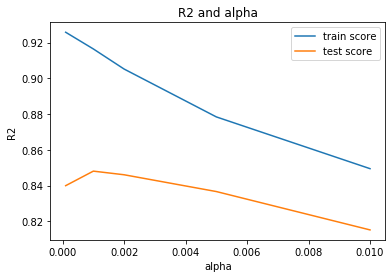

In [74]:
# plotting mean test and train scoes with alpha 
cv_model_lasso_r2_results['param_alpha'] = cv_model_lasso_r2_results['param_alpha'].astype('float32')

# plotting between R2Score and alpha
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.plot(cv_model_lasso_r2_results['param_alpha'], cv_model_lasso_r2_results['mean_train_score'])
plt.plot(cv_model_lasso_r2_results['param_alpha'], cv_model_lasso_r2_results['mean_test_score'])
plt.legend(['train score', 'test score'], loc='upper right')


In [75]:
# finding out the best score and optimum value of alpha.
print(cv_model_lasso_r2.best_estimator_)
print('best alpha value:',cv_model_lasso_r2.best_params_)
print('best score:',cv_model_lasso_r2.best_score_)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
best alpha value: {'alpha': 0.001}
best score: 0.84804352776244


From the above,the alpha value is 10 from the both r2 score and negative mean absolute error. Hence we are considering alpha value =0.001 for the lasso regression.

    alpha = 0.001

In [76]:
#proceeding with the alpha value 0.01
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('r2 Score for Train is ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('r2 Score for Test is ',r2_score(y_true=y_test,y_pred=y_test_pred))

r2 Score for Train is  0.9134974323693211
r2 Score for Test is  0.8675326167910745


In [77]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = housePrice_df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficient']

In [78]:
#coefficients 
lasso.coef_

array([-0.01431685,  0.04646176,  0.131012  ,  0.07831879,  0.0063069 ,
        0.05471866,  0.05267936,  0.04900168,  0.12310673,  0.19530442,
        0.0462622 ,  0.02804732,  0.00329926, -0.00970021, -0.00768063,
       -0.00107427, -0.20862903, -0.        ,  0.        , -0.        ,
       -0.07933452,  0.05343785,  0.        ,  0.        , -0.        ,
       -0.02047434, -0.11732055, -0.41550757, -0.34284604, -0.        ,
        0.04792206, -0.09774642,  0.00716869,  0.09472826, -0.03316641,
       -0.        ,  0.        ,  0.00522227,  0.30602879, -0.18394444,
       -0.        , -0.27071841, -0.01707177, -0.        , -0.00849395,
        0.15664218,  0.26764374, -0.18755502,  0.05082187, -0.08581978,
        0.        ,  0.26219405, -0.        ,  0.00808461,  0.0732087 ,
       -0.        ,  0.        , -0.06478889, -0.        ,  0.        ,
       -0.58267387, -0.10920337, -0.12526722, -0.06450211,  0.        ,
        0.13499912,  0.31857262,  0.56331774,  0.04559978, -0.  

In [79]:
lasso_coef[:10].sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,YearRemodAdd,0.131012
9,GrLivArea,0.123107
4,MasVnrArea,0.078319
6,CentralAir,0.054719
7,1stFlrSF,0.052679
8,2ndFlrSF,0.049002
2,YearBuilt,0.046462
0,LotFrontage,0.032802
5,TotalBsmtSF,0.006307
1,LotArea,-0.014317


In [80]:
lasso_rmse = Lasso(alpha=0.001)
lasso_rmse.fit(X_train,y_train)

y_pred_train = lasso_rmse.predict(X_train)
print('Mean Squared error for Train is ',np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lasso_rmse.predict(X_test)
print('Mean Squared error for Test is ',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Mean Squared error for Train is  0.2941131884677714
Mean Squared error for Test is  0.3639606890983221


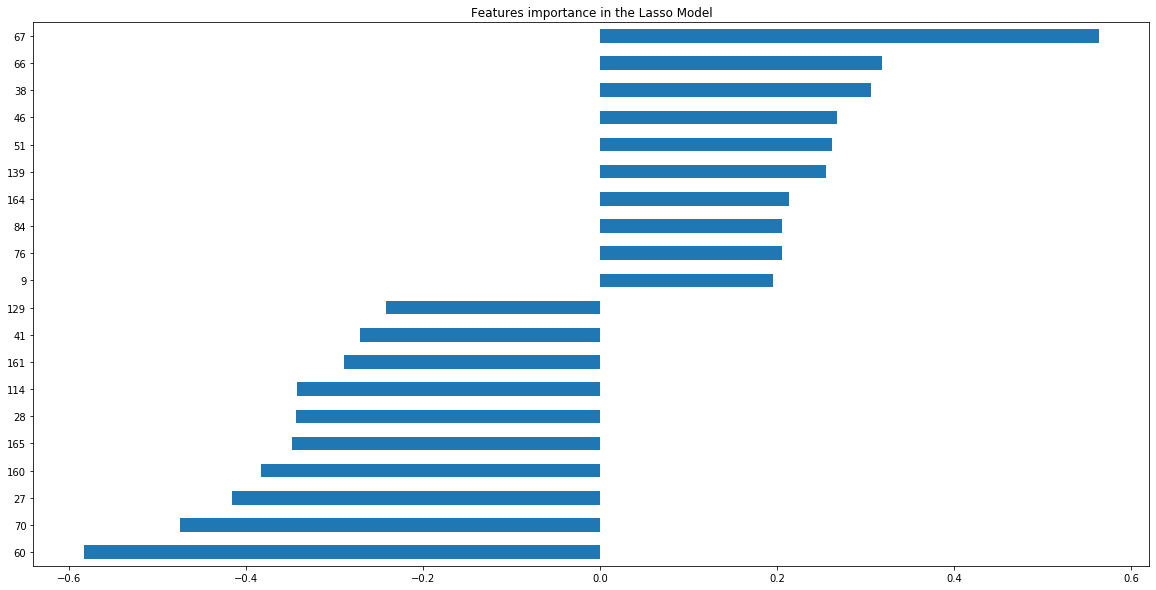

In [81]:
plt.figure(figsize=(20, 10))
coefs = pd.Series(lasso.coef_)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Features importance in the Lasso Model")
plt.show()

## Subjective Questions

#### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

From the above, We got the following alpha optimal values:

    Alpha = 10 (Ridge)

    Alpha = 0.001(Lasso)

Now we are Implementing double the value of alpha for both models, hence the alpha values will be the following for the Ridge and Lasso and the predictions will be as follows:
    
    Alpha = 20 (Ridge)
    
    Alpha = 0.002 (Lasso)

Considering the above, we are proceeding with alpha = 20 and continued with Ridge regression

In [82]:
# rebuilding the Ridge Regression, with alpha = 20
ridge_new = Ridge(alpha = 20)
ridge_new.fit(X_train,y_train)
# r2 score for train set
y_pred_train_new = ridge_new.predict(X_train)
print('r2 Score for Train is ',r2_score(y_train,y_pred_train_new))
#r2 score for test set
y_pred_test_new = ridge_new.predict(X_test)
print('r2 Score for test is ',r2_score(y_test,y_pred_test_new))

r2 Score for Train is  0.9012229283354803
r2 Score for test is  0.8632344435896999


In [83]:
model_parameter_new = list(ridge_new.coef_)
model_parameter_new.insert(0,ridge_new.intercept_)
cols = housePrice_df.columns
cols.insert(0,'constant')
ridge_coef_new = pd.DataFrame(list(zip(cols,model_parameter_new)))
ridge_coef_new.columns = ['Features','Coefficient']

In [84]:
ridge_coef_new[:10].sort_values(by='Coefficient',ascending=False)#.head(10)

,Features,Coefficient
9,GrLivArea,0.135826
0,LotFrontage,0.104112
8,2ndFlrSF,0.077311
3,YearRemodAdd,0.069702
6,CentralAir,0.068973
7,1stFlrSF,0.068100
2,YearBuilt,0.050753
4,MasVnrArea,0.046765
5,TotalBsmtSF,0.012624
1,LotArea,-0.010894


In [85]:
#rebuilding lasso regression model with alpha 0.002
lasso_new = Lasso(alpha=0.002)
lasso_new.fit(X_train,y_train)
y_train_pred_new1 = lasso_new.predict(X_train)
y_test_pred_new1 = lasso_new.predict(X_test)
print('r2 Score for Train set',r2_score(y_true=y_train,y_pred=y_train_pred_new1))
print('r2 score for Test set',r2_score(y_true=y_test,y_pred=y_test_pred_new1))

r2 Score for Train set 0.90234690911789
r2 score for Test set 0.8682349214725892


In [86]:
model_lasso_new = list(lasso_new.coef_)
model_lasso_new.insert(0,lasso_new.intercept_)
cols = housePrice_df.columns
cols.insert(0,'const')
lasso_coef_new = pd.DataFrame(list(zip(cols,model_lasso_new)))
lasso_coef_new.columns = ['Features','Coefficient']
lasso_coef_new[:10].sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,YearRemodAdd,0.121152
4,MasVnrArea,0.091519
6,CentralAir,0.074965
7,1stFlrSF,0.061901
9,GrLivArea,0.059103
2,YearBuilt,0.045717
8,2ndFlrSF,0.011501
5,TotalBsmtSF,0.009684
1,LotArea,-0.014352
0,LotFrontage,-0.046562


#### Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?



From the above, I got the following optimal values of alpha:

    Alpha = 10 (Ridge)

    Alpha = 0.001 (Lasso)

I will apply the Lasso regression model with 0.001 value of Alpha since it performs the feature selection by way of reducing some of the variable coefficients to zero which is very useful for us in this case since we have around 200 independant features here in the dataset.

In [87]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = housePrice_df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coef']
lasso_coef[:10].sort_values(by='Coef',ascending=False)

,Features,Coef
3,YearRemodAdd,0.131012
9,GrLivArea,0.123107
4,MasVnrArea,0.078319
6,CentralAir,0.054719
7,1stFlrSF,0.052679
8,2ndFlrSF,0.049002
2,YearBuilt,0.046462
0,LotFrontage,0.032802
5,TotalBsmtSF,0.006307
1,LotArea,-0.014317


#### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [88]:
housePrice_df_new = housePrice_df.drop(['YearRemodAdd','GrLivArea','MasVnrArea','CentralAir','1stFlrSF'],axis=1)
housePrice_df_new.head()

,LotFrontage,LotArea,YearBuilt,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,HouseAge,House_RemodelAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,65.0,8450,2003,856,854,548,0,61,2008,12.247694,17,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,1976,1262,0,460,298,0,2007,12.109011,44,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
2,68.0,11250,2001,920,866,608,0,42,2008,12.317167,19,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0

In [89]:
# Splitting the data set into train and test set
housePrice_df_new_train,housePrice_df_new_test = train_test_split(housePrice_df_new, train_size=0.7,random_state=100)

In [90]:
# Scaling the continuous variables.
scaler = StandardScaler()
housePrice_df_new_train[['LotFrontage', 'LotArea', 'YearBuilt', 'TotalBsmtSF',
  '2ndFlrSF',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'HouseAge', 'House_RemodelAge']] = scaler.fit_transform(housePrice_df_new_train[['LotFrontage', 'LotArea', 'YearBuilt',  'TotalBsmtSF',
  '2ndFlrSF',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'HouseAge', 'House_RemodelAge']])
housePrice_df_new_test[['LotFrontage', 'LotArea', 'YearBuilt', 'TotalBsmtSF',
  '2ndFlrSF',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'HouseAge', 'House_RemodelAge']] = scaler.fit_transform(housePrice_df_new_test[['LotFrontage', 'LotArea', 'YearBuilt',  'TotalBsmtSF',
  '2ndFlrSF',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice', 'HouseAge', 'House_RemodelAge']])

In [91]:
y_train_new = housePrice_df_new_train.pop('SalePrice')
X_train_new = housePrice_df_new_train

In [92]:
y_test_new = housePrice_df_new_test.pop('SalePrice')
X_test_new = housePrice_df_new_test

From the above, it is clear that we need to find out the five most important variables, hence we are building the lasso regression

## Lasso Regression - Modified

In [93]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 10
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train_new) 

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.8s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [94]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.144176,0.059619,0.001738,0.000515,0.0001,{'alpha': 0.0001},-0.248844,-0.267139,-0.247331,-0.270725,-0.289011,-0.280504,-0.254883,-0.246093,-0.235280,-0.274172,-0.261386,0.016504,2,-0.205789,-0.206629,-0.205350,-0.192843,-0.202144,-0.199039,-0.204953,-0.207280,-0.208586,-0.202581,-0.203519,0.004437
1,0.021053,0.006425,0.001477,0.000068,0.001,{'alpha': 0.001},-0.228630,-0.245051,-0.244769,-0.267880,-0.290029,-0.272356,-0.243306,-0.244542,-0.230252,-0.245609,-0.251220,0.018440,1,-0.213567,-0.214823,-0.213175,-0.202574,-0.211495,-0.206371,-0.212665,-0.212990,-0.215530,-0.209861,-0.211305,0.003824
2,0.007099,0.000259,0.001425,0.000079,0.01,{'alpha': 0.01},-0.261301,-0.248085,-0.249961,-0.338782,-0.319232,-0.306678,-0.266393,-0.277543,-0.303615,-0.271829,-0.284319,0.029327,3,-0.271071,-0.271802,-0.274923,-0.262883,-0.266460,-0.267683,-0.270598,-0.270771,-0.272624,-0.271611,-0.270042,0.003280


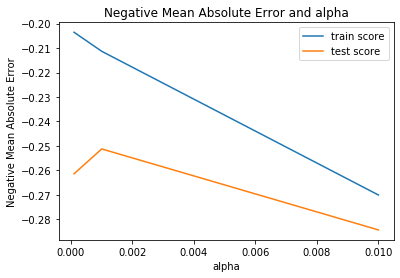

In [95]:
# plotting mean test and train scores with alpha 
lasso_cv_modified_results['param_alpha'] = lasso_cv_modified_results['param_alpha'].astype('float32')
# plotting between the negative mean absolute error and alpha
plt.plot(lasso_cv_modified_results['param_alpha'], lasso_cv_modified_results['mean_train_score'])
plt.plot(lasso_cv_modified_results['param_alpha'], lasso_cv_modified_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

In [96]:
# Printing the best score and optimum value of alpha.
print(lasso_cv_model_modified.best_estimator_)
print('Best alpha value:',lasso_cv_model_modified.best_params_)
print('Best score:',lasso_cv_model_modified.best_score_)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Best alpha value: {'alpha': 0.001}
Best score: -0.2512201869102882


In [97]:
lasso_new_modified = Lasso(alpha=0.001)
lasso_new_modified.fit(X_train_new,y_train_new)

y_train_new_pred = lasso_new_modified.predict(X_train_new)
y_test_new_pred = lasso_new_modified.predict(X_test_new)

print('r2 Score for Train:',r2_score(y_true=y_train_new,y_pred=y_train_new_pred))
print('r2 Score for Test:',r2_score(y_true=y_test_new,y_pred=y_test_new_pred))

r2 Score for Train: 0.9091718231774004
r2 Score for Test: 0.8616221073272513


In [98]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = housePrice_df_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficient']

In [99]:
lasso_coef[:10].sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,TotalBsmtSF,0.131012
9,SalePrice,0.123107
4,2ndFlrSF,0.078319
6,WoodDeckSF,0.054719
7,OpenPorchSF,0.052679
8,YrSold,0.049002
2,YearBuilt,0.046462
0,LotFrontage,0.032802
5,GarageArea,0.006307
1,LotArea,-0.014317
